# Bernoulli Naive Bayes — Advanced Theory & Interview Q&A

## Advanced Theory

- **Bayes’ Theorem:** Calculates posterior probability using prior and likelihood.
- **Bernoulli Assumption:** Features are binary (0/1), representing presence/absence.
- **Conditional Independence:** Assumes features are independent given the class label.
- **Smoothing (alpha):** Prevents zero probabilities for unseen features.
- **Feature Engineering:** Binarize features, select informative features.
- **Class Imbalance:** Adjust prior probabilities or use ComplementNB.
- **Extensions:** MultinomialNB (discrete features), ComplementNB (imbalanced data).
- **Diagnostics:** Confusion matrix, ROC-AUC, precision-recall curves.
- **Limitations:** Sensitive to correlated features and non-binary data.

## Advanced Interview Q&A

**Q1: What is the main assumption of BernoulliNB?**  
A: Features are conditionally independent and binary (0/1).

**Q2: How do you handle zero probabilities in BernoulliNB?**  
A: Use Laplace smoothing (alpha > 0).

**Q3: How do you handle class imbalance?**  
A: Adjust prior probabilities, use ComplementNB, or resample.

**Q4: What is the impact of correlated features?**  
A: Violates independence assumption, can degrade performance.

**Q5: How do you assess model fit?**  
A: Use accuracy, ROC-AUC, precision-recall curves, confusion matrix.

**Q6: What is ComplementNB?**  
A: A variant for imbalanced data, improves performance over BernoulliNB.

**Q7: How do you handle non-binary features?**  
A: Binarize features or use MultinomialNB.

**Q8: How do you select informative features?**  
A: Use feature selection, binarization, or domain knowledge.

**Q9: How do you handle categorical variables?**  
A: Encode as binary or use MultinomialNB for counts.

**Q10: What is the role of alpha in BernoulliNB?**  
A: Controls smoothing, prevents zero probabilities.

# Bernoulli Naive Bayes Classification — Theory & Interview Q&A

Bernoulli Naive Bayes is a probabilistic classifier based on Bayes’ theorem, suitable for binary/boolean features (e.g., word presence/absence).

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Classifies data using Bayes’ theorem and Bernoulli distribution.        |
| **Equation**          | P(y|X) ∝ P(X|y)P(y), P(X|y) is Bernoulli                               |
| **Use Cases**         | Text classification, spam detection, document categorization            |
| **Assumptions**       | Feature independence, binary features                                   |
| **Pros**              | Fast, simple, works well for binary data                                |
| **Cons**              | Assumes independence, not suitable for non-binary features              |
| **Key Parameters**    | alpha (smoothing), binarize threshold                                  |
| **Evaluation Metrics**| Accuracy, Precision, Recall, F1-score                                   |

## Interview Q&A

**Q1: When do you use Bernoulli Naive Bayes?**  
A: For classification tasks with binary features, like word presence.

**Q2: What is the role of alpha in BernoulliNB?**  
A: It is a smoothing parameter to handle zero probabilities.

**Q3: What is binarize in BernoulliNB?**  
A: It sets the threshold for converting counts to binary values.

**Q4: How is BernoulliNB different from MultinomialNB?**  
A: BernoulliNB is for binary features, MultinomialNB for discrete counts.

**Q5: How do you evaluate BernoulliNB?**  
A: Using accuracy, precision, recall, and F1-score.

**Q6: What are the limitations?**  
A: Poor performance if features are correlated or not binary.

Best Parameters: {'bnb__alpha': 0.1, 'bnb__binarize': 0.0}
Test Accuracy: 0.992462311557789

Classification Report:
                   precision    recall  f1-score   support

rec.sport.hockey       0.99      1.00      0.99       200
       sci.space       1.00      0.98      0.99       198

        accuracy                           0.99       398
       macro avg       0.99      0.99      0.99       398
    weighted avg       0.99      0.99      0.99       398



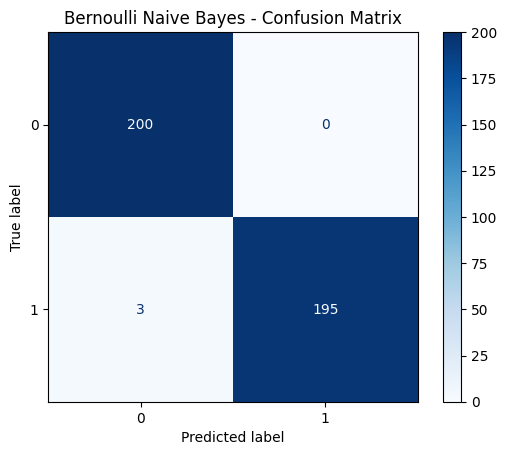

In [1]:
# 1️⃣ Imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 2️⃣ Load dataset (subset for binary features scenario)
categories = ['rec.sport.hockey', 'sci.space']  # two categories for simplicity
data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

# 3️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42, stratify=data.target
)

# 4️⃣ Pipeline: CountVectorizer -> TF-IDF -> BernoulliNB
# Bernoulli NB expects binary occurrence features (word present/absent)
pipeline = Pipeline([
    ('vect', CountVectorizer(binary=True)),  # convert counts to 0/1 presence
    ('tfidf', TfidfTransformer(use_idf=True)),  # optional TF-IDF scaling
    ('bnb', BernoulliNB())
])

# 5️⃣ Hyperparameter tuning
param_grid = {
    'bnb__alpha': [0.1, 0.5, 1.0],  # smoothing
    'bnb__binarize': [0.0, 0.5]    # threshold for binarization if using non-binary counts
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 6️⃣ Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# 7️⃣ Confusion matrix visualization
cm = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Bernoulli Naive Bayes - Confusion Matrix")
plt.show()
